






<h2 id='part1'>Airbnb: Boston vs. Seattle Analysis</h2>

In order to get a better understanding of the which market is better and more affordable, let's take a look at some of the characteristics of the dataset.

#### Data Summary

There are 3 datasets from Airbnb:

1. calendar.csv - data with availability dates, price for each date.
2. listings.csv - data about listing specific information
3. reviews.csv - data about review specific information

I will not use the reviews dataset since some of that information is already contained in the listings dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime
import calendar

%matplotlib inline

#read in data
Boston_Calendar = pd.read_csv('./Data/Boston/calendar.csv')
Boston_Listings = pd.read_csv('./Data/Boston/listings.csv')
Boston_Reviews = pd.read_csv('./Data/Boston/reviews.csv')

Seattle_Calendar = pd.read_csv('./Data/Seattle/calendar.csv')
Seattle_Listings = pd.read_csv('./Data/Seattle/listings.csv')
Seattle_Reviews = pd.read_csv('./Data/Seattle/reviews.csv')

#remove dollar sign from price and rename
Boston_Calendar['price'] = Boston_Calendar['price'].astype(str)
Boston_Calendar['pricepaid'] = Boston_Calendar['price'].str.replace("[$, ]", "").astype("float")

Seattle_Calendar['price'] = Seattle_Calendar['price'].astype(str)
Seattle_Calendar['pricepaid'] = Seattle_Calendar['price'].str.replace("[$, ]", "").astype("float")
#drop old column
Boston_Calendar = Boston_Calendar.drop(columns = 'price')
Seattle_Calendar = Seattle_Calendar.drop(columns = 'price')

Boston_Calendar['month'] = Boston_Calendar.apply(lambda Boston_Calendar: int(Boston_Calendar['date'].split('-')[1]),axis=1)
Boston_Calendar['weekday'] = Boston_Calendar.apply(lambda Boston_Calendar: calendar.day_name[datetime.strptime(Boston_Calendar['date'], '%Y-%m-%d').weekday()],axis=1)

Seattle_Calendar['month'] = Seattle_Calendar.apply(lambda Seattle_Calendar: int(Seattle_Calendar['date'].split('-')[1]),axis=1)
Seattle_Calendar['weekday'] = Seattle_Calendar.apply(lambda Seattle_Calendar: calendar.day_name[datetime.strptime(Seattle_Calendar['date'], '%Y-%m-%d').weekday()],axis=1)

#remove some columns from the listings dataset we don't need for analysis-this will make the dataset more manageable
drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 
        'host_about', 
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'calendar_last_scraped',
       'review_scores_location',  'requires_license', 
       'license', 'jurisdiction_names', 
       'require_guest_profile_picture','host_verifications', 
       'require_guest_phone_verification', 'calculated_host_listings_count']
Seattle_Listings = Seattle_Listings.drop(columns = drop_columns)
Boston_Listings = Boston_Listings.drop(columns = drop_columns)


#create one big dataset
Boston = pd.merge(Boston_Calendar, Boston_Listings, left_on='listing_id', right_on='id')
Seattle = pd.merge(Seattle_Calendar, Seattle_Listings, left_on='listing_id', right_on='id')
Boston['city']='Boston'
Seattle['city']='Seattle'
All_Data=Boston.append(Seattle, ignore_index=True)



In [2]:
Seattle_Calendar.head()

,listing_id,date,available,pricepaid,month,weekday
0,241032,2016-01-04,t,85.0,1,Monday
1,241032,2016-01-05,t,85.0,1,Tuesday
2,241032,2016-01-06,f,NaN,1,Wednesday
3,241032,2016-01-07,f,NaN,1,Thursday
4,241032,2016-01-08,f,NaN,1,Friday


In Boston, there are 3585 unique listings. The date range is from 2016-09-06 to 2017-09-05.
Listings have an average price of $198
In Seattle, there are 3818 unique listings. The date range is from 2016-01-04 to 2017-01-02.
Listings have an average price of $137


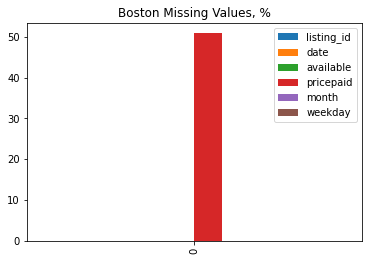

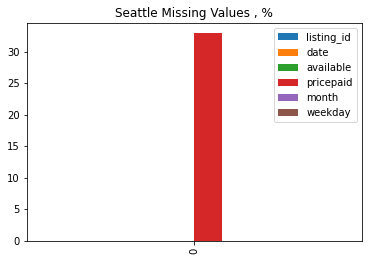

In [3]:
#find number of listings and number of hosts
print('In Boston, there are %d unique listings. The date range is from %s to %s.' % (len(Boston_Calendar['listing_id'].unique()), Boston_Calendar['date'].min(),Boston_Calendar['date'].max()))
print('Listings have an average price of $%d' % (Boston_Calendar['pricepaid'].mean().round(2)))


missing_BOS = pd.DataFrame([Boston_Calendar.isnull().mean()*100])
missing_BOS.plot.bar(title='Boston Missing Values, %')

print('In Seattle, there are %d unique listings. The date range is from %s to %s.' % (len(Seattle_Calendar['listing_id'].unique()), Seattle_Calendar['date'].min(),Seattle_Calendar['date'].max()))
print('Listings have an average price of $%d' % (Seattle_Calendar['pricepaid'].mean().round(2)))

#missing percent by column
missing_SEA = pd.DataFrame([Seattle_Calendar.isnull().mean()*100])
missing_SEA.plot.bar(title='Seattle Missing Values , %')

/Users/nicholasreimold/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nicholasreimold/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


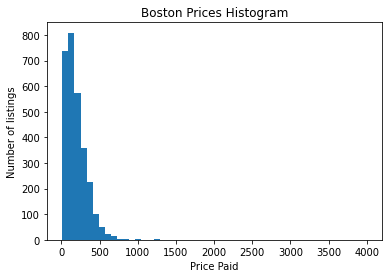

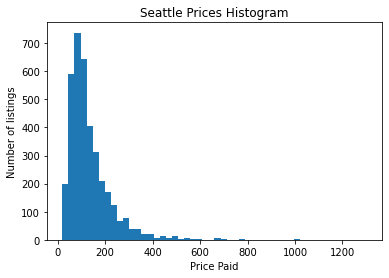

In [4]:
#get the average price for each listing
bosprice = Boston_Calendar.groupby(['listing_id']).mean()['pricepaid']
seaprice = Seattle_Calendar.groupby(['listing_id']).mean()['pricepaid']

plt.hist(bosprice, bins=50)
plt.ylabel('Number of listings')
plt.xlabel('Price Paid')
plt.title('Boston Prices Histogram')
plt.show()

plt.hist(seaprice, bins=50)
plt.ylabel('Number of listings')
plt.xlabel('Price Paid')
plt.title('Seattle Prices Histogram')
plt.show()

In [5]:
Seattle_Listings.head()

,id,transit,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,241032,NaN,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,3.0,3.0,...,2016-01-02,95.0,10.0,10.0,10.0,10.0,10.0,f,moderate,4.07
1,953595,"Convenient bus stops are just down the block, ...",2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,6.0,6.0,...,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,f,strict,1.48
2,3308979,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,2.0,2.0,...,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,f,strict,1.15
3,7421966,NaN,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
4,278830,The nearest public transit bus (D Line) is 2 b...,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,2.0,2.0,...,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,f,strict,0.89


In Boston, there are 3585 unique listings in 31 neighborhoods.
On average, listings have 1 bedroom and 1 bathroom with a minimum stay of 3 days.


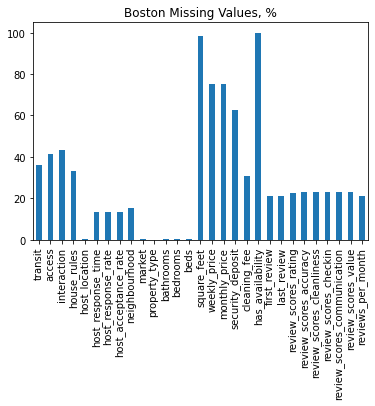

In Seattle, there are 3818 unique listings in 82 neighborhoods.
On average, listings have 1 bedroom and 1 bathroom with a minimum stay of 2 days.


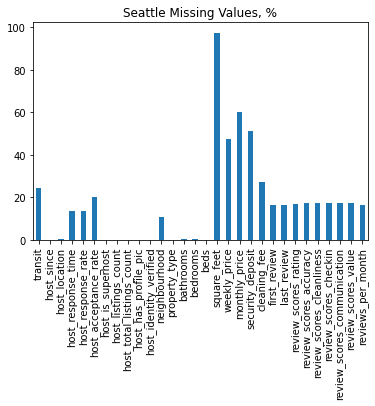

In [6]:
#find number of listings and number of hosts
print('In Boston, there are %d unique listings in %d neighborhoods.' % (len(Boston_Listings['id'].unique()), len(Boston_Listings['neighbourhood'].unique())))
print('On average, listings have %d bedroom and %d bathroom with a minimum stay of %d days.' % (Boston_Listings['bedrooms'].mean(), Boston_Listings['bathrooms'].mean(),Boston_Listings['minimum_nights'].mean()))


#find percentage of missing values for each column
missingBoston = Boston_Listings.isnull().mean()*100
#only look at with missing values because so many columns
missingBoston = missingBoston[missingBoston > 0]
missingBoston.plot.bar(title='Boston Missing Values, %')
plt.show()



print('In Seattle, there are %d unique listings in %d neighborhoods.' % (len(Seattle_Listings['id'].unique()), len(Seattle_Listings['neighbourhood'].unique())))
print('On average, listings have %d bedroom and %d bathroom with a minimum stay of %d days.' % (Seattle_Listings['bedrooms'].mean(), Seattle_Listings['bathrooms'].mean(),Seattle_Listings['minimum_nights'].mean()))

#find percentage of missing values for each column
missingSeattle = Seattle_Listings.isnull().mean()*100
#only look at with missing values because so many columns
missingSeattle = missingSeattle[missingSeattle > 0]
missingSeattle.plot.bar(title='Seattle Missing Values, %')
plt.show()




## How is the Rating Distribution Between Cities?

/Users/nicholasreimold/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nicholasreimold/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


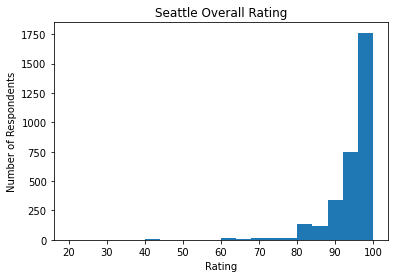

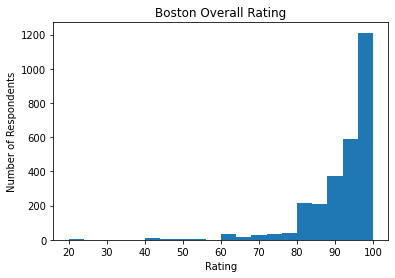

In [7]:
plt.hist(Seattle_Listings['review_scores_rating'], bins=20)
plt.ylabel('Number of Respondents')
plt.xlabel('Rating')
plt.title('Seattle Overall Rating')
plt.show()

plt.hist(Boston_Listings['review_scores_rating'], bins=20)
plt.ylabel('Number of Respondents')
plt.xlabel('Rating')
plt.title('Boston Overall Rating')
plt.show()

# When should we visit each city?

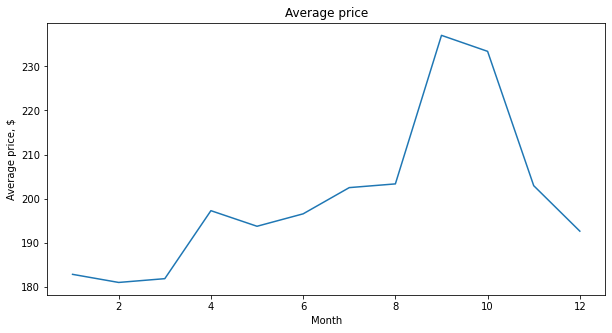

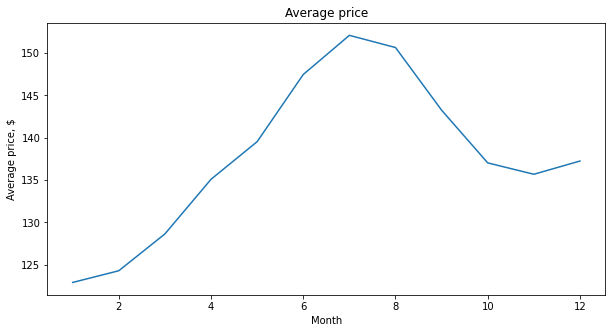

In [9]:
plt.figure(figsize=(10,5))
plt.plot(Boston_Calendar.groupby(['month'])['pricepaid'].mean())
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(Seattle_Calendar.groupby(['month'])['pricepaid'].mean())
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.show()

# What features most influence the price or booking of a listing?

# Can we predict the price?